In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [59]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df = df.drop(columns=['Person ID'])

In [60]:
df.head(20)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [61]:
df.isnull().sum()


Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [62]:
print(f"before dropping the na rows size of dataset is {df.size}")
#df['Sleep Disorder'] = df['Sleep Disorder'].fillna(np.NAN, "Not Classified")
df = df.dropna()
print(f"after dropping the na rows size of dataset is {df.size}")

before dropping the na rows size of dataset is 4488
after dropping the na rows size of dataset is 1860


### Preprocessing

In [63]:
df.columns

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['BMI Category'] = encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = encoder.fit_transform(df['Sleep Disorder'])
df['Blood Pressure'] = encoder.fit_transform(df['Blood Pressure'])

In [64]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,1,28,5,5.9,4,30,8,2,11,85,3000,1
4,1,28,5,5.9,4,30,8,2,11,85,3000,1
5,1,28,8,5.9,4,30,8,2,11,85,3000,0
6,1,29,9,6.3,6,40,7,2,11,82,3500,0
16,0,29,4,6.5,5,40,7,1,7,80,4000,1


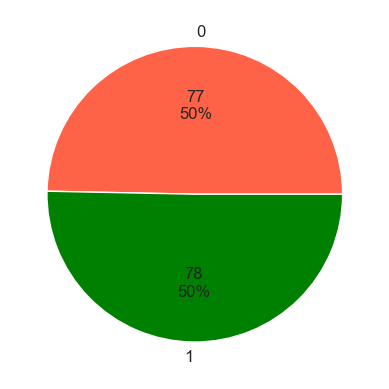

In [65]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, ax = plt.subplots()
df.groupby('Sleep Disorder').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12},
                                                   colors=['tomato', 'green', 'gold'], ax=ax)
plt.show()

<Axes: xlabel='Gender', ylabel='Density'>

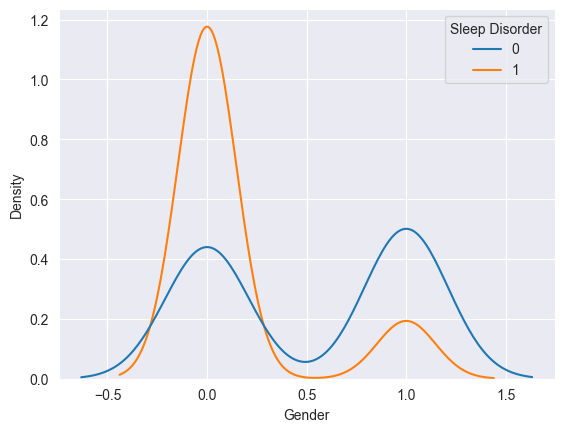

In [66]:
sns.kdeplot(data=df, x="Gender", hue="Sleep Disorder")

<Axes: xlabel='Age', ylabel='Density'>

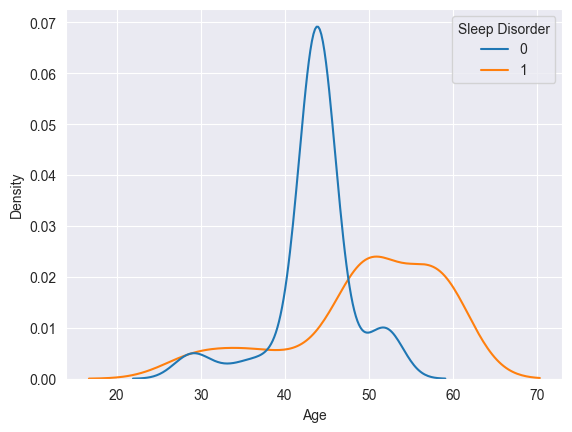

In [67]:
sns.kdeplot(data=df, x="Age", hue="Sleep Disorder")

<Axes: xlabel='Occupation', ylabel='Density'>

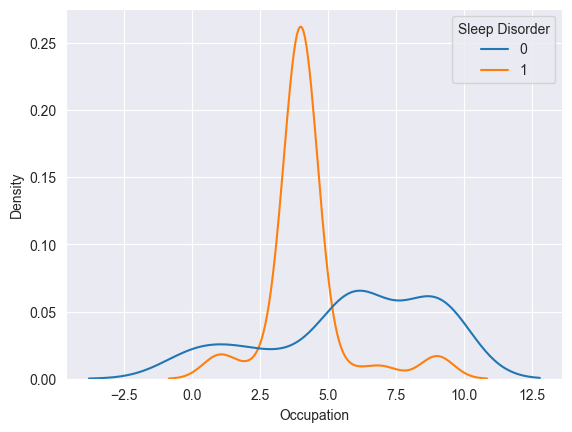

In [68]:
sns.kdeplot(data=df, x="Occupation", hue="Sleep Disorder")

<Axes: xlabel='Quality of Sleep', ylabel='Density'>

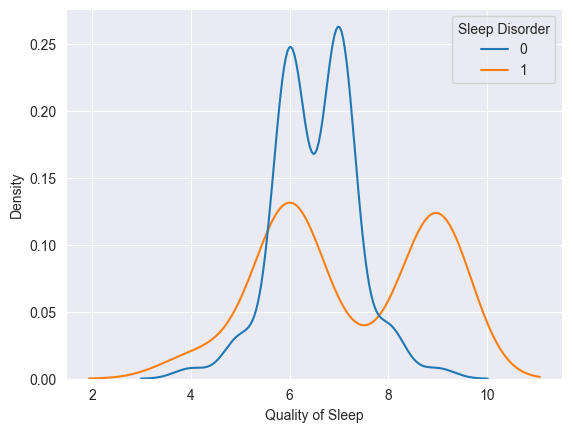

In [69]:
sns.kdeplot(data=df, x="Quality of Sleep", hue="Sleep Disorder")

<Axes: >

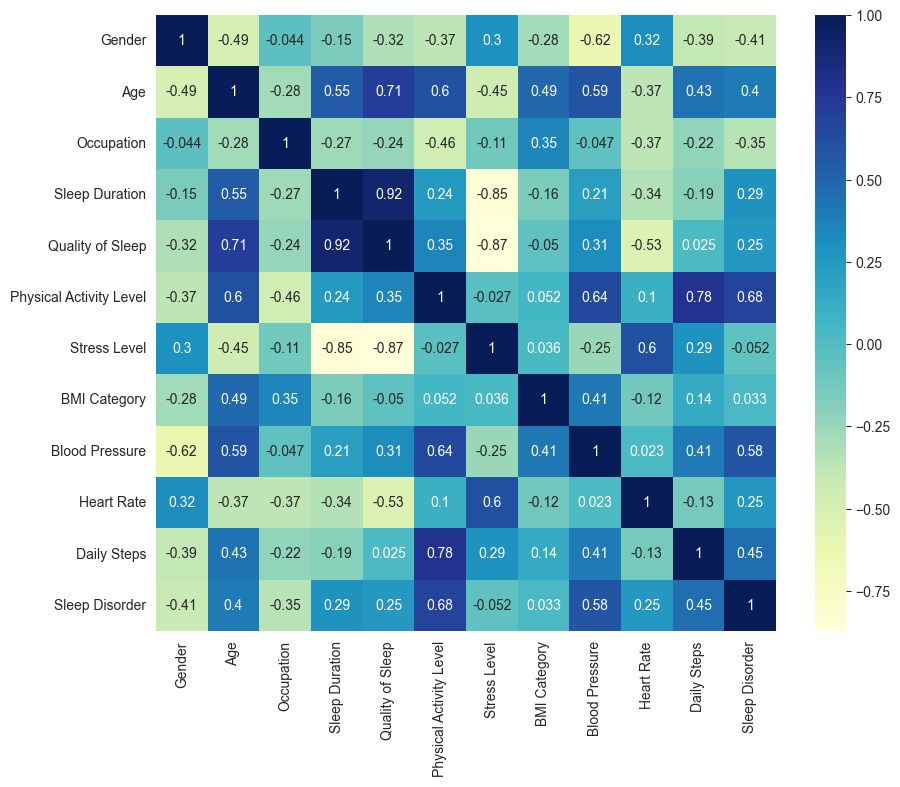

In [70]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

### Training preparation

In [72]:
X_train=df.drop(columns=["Sleep Disorder"])
y_train=df["Sleep Disorder"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [73]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (124, 11)
Test dataset shape (124,)


In [74]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index([], dtype='object'))])

### Generic Methods

In [76]:
from sklearn.decomposition import TruncatedSVD


def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [77]:
from sklearn.metrics import confusion_matrix


def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix')

In [78]:
from sklearn.metrics import classification_report


def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [79]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc


def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

### Run

In [80]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


algorithms = [('bagging classifier', BaggingClassifier()),
              ('KNN classifier', KNeighborsClassifier()),
              ('Random Forest calssifier', RandomForestClassifier()),
              ('Adaboost classifier', AdaBoostClassifier()),
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier()),
              ('XGBClassifier', XGBClassifier())
              ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [81]:
print(model_and_score)

{'bagging classifier': '97.58064516129032%', 'KNN classifier': '88.70967741935483%', 'Random Forest calssifier': '98.38709677419355%', 'Adaboost classifier': '98.38709677419355%', 'Gradientboot classifier': '98.38709677419355%', 'MLP': '90.32258064516128%', 'XGBClassifier': '98.38709677419355%'}


bagging classifier


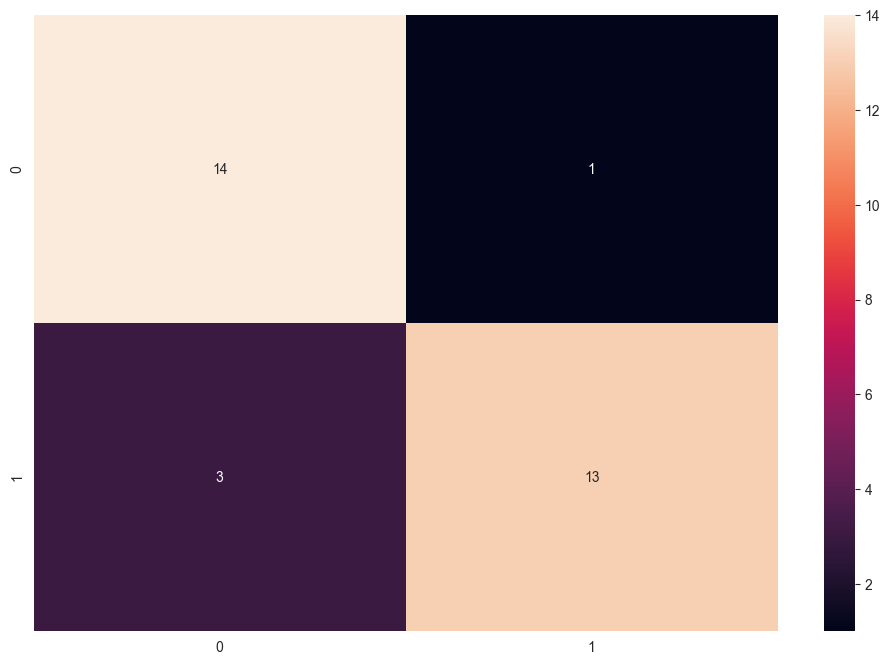

KNN classifier


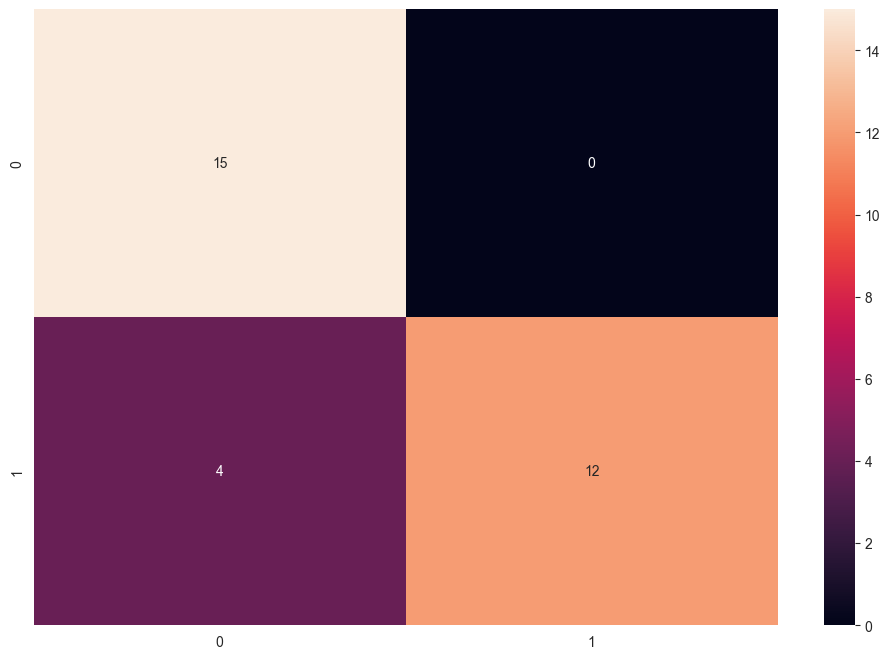

Random Forest calssifier


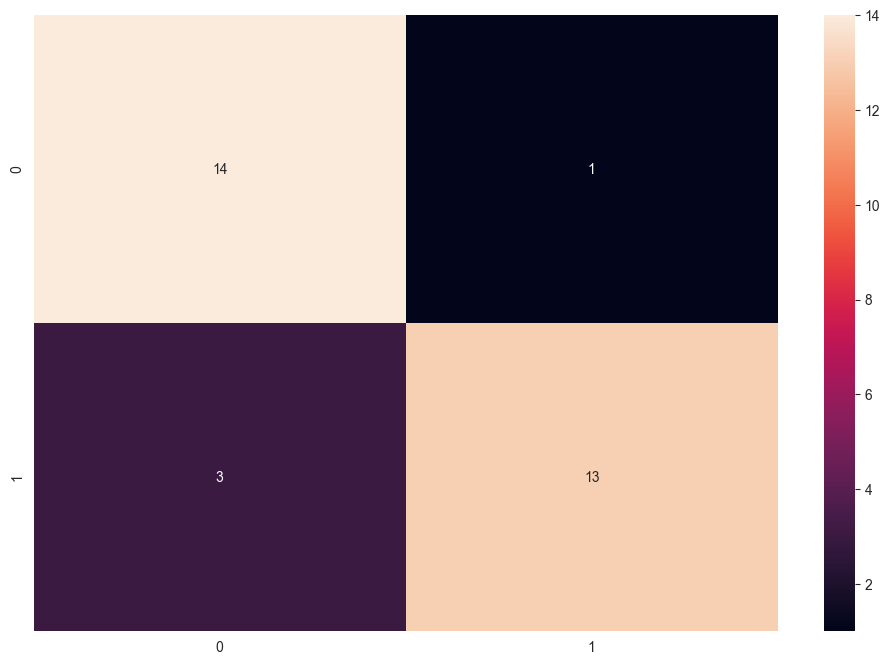

Adaboost classifier


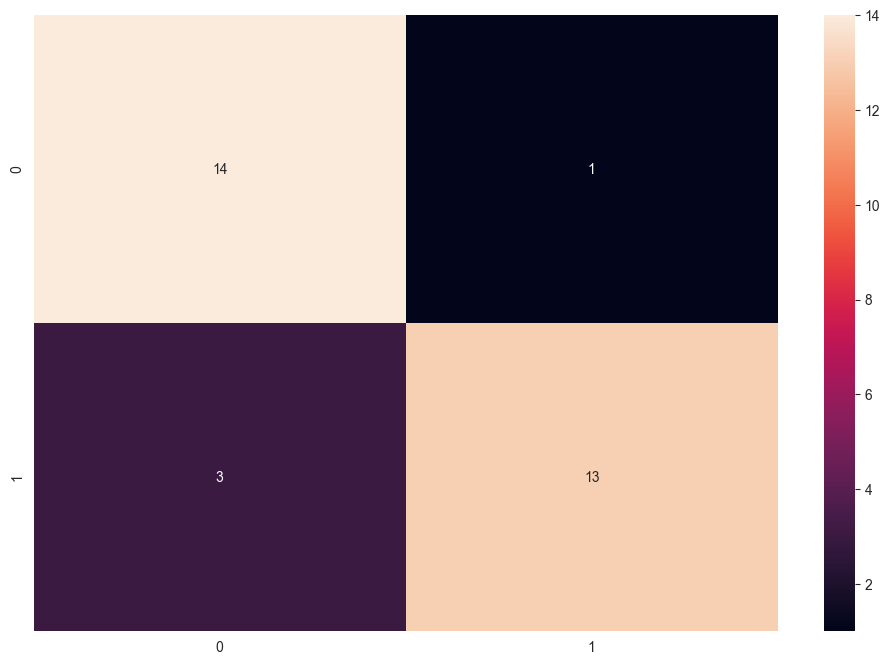

Gradientboot classifier


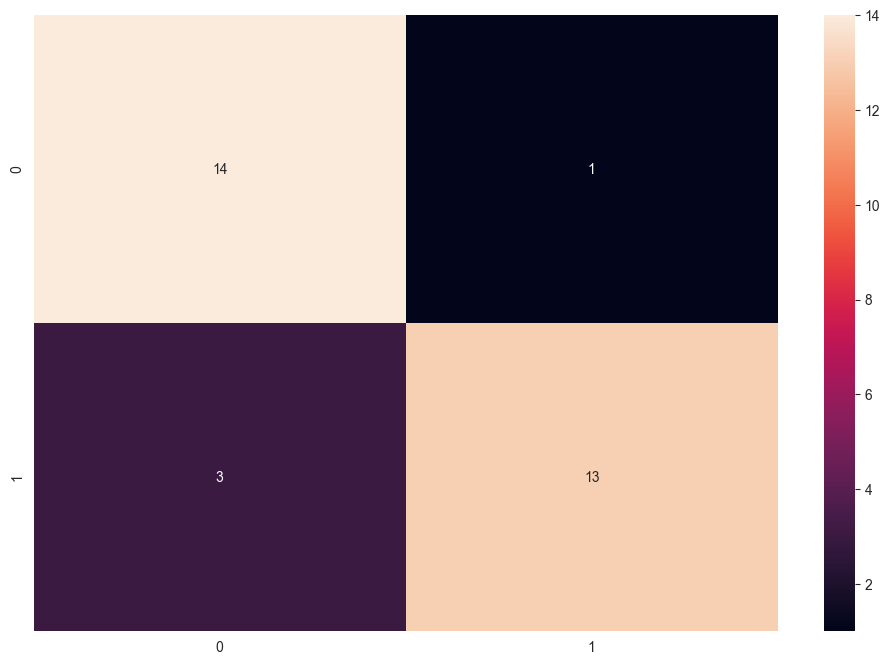

MLP


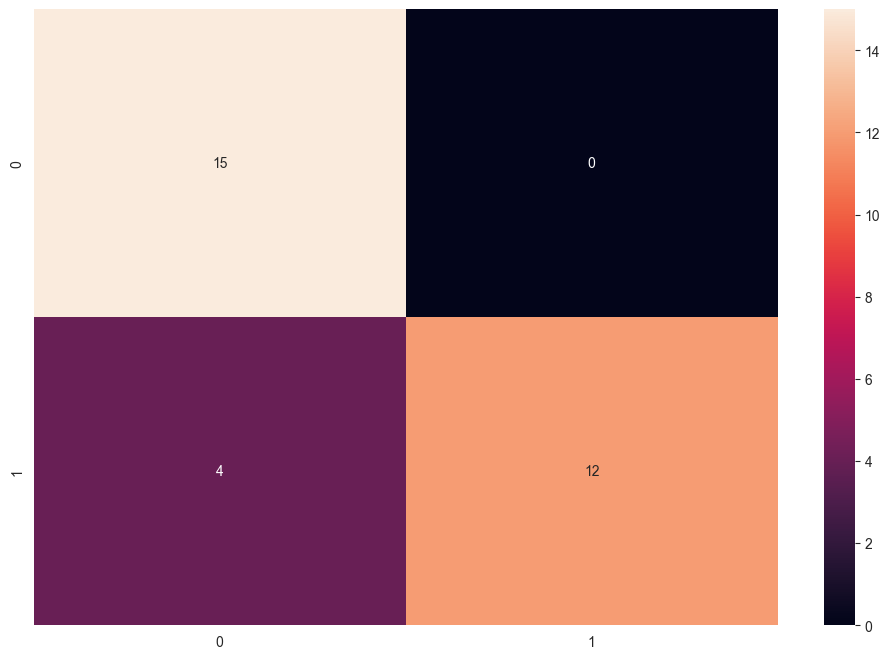

XGBClassifier


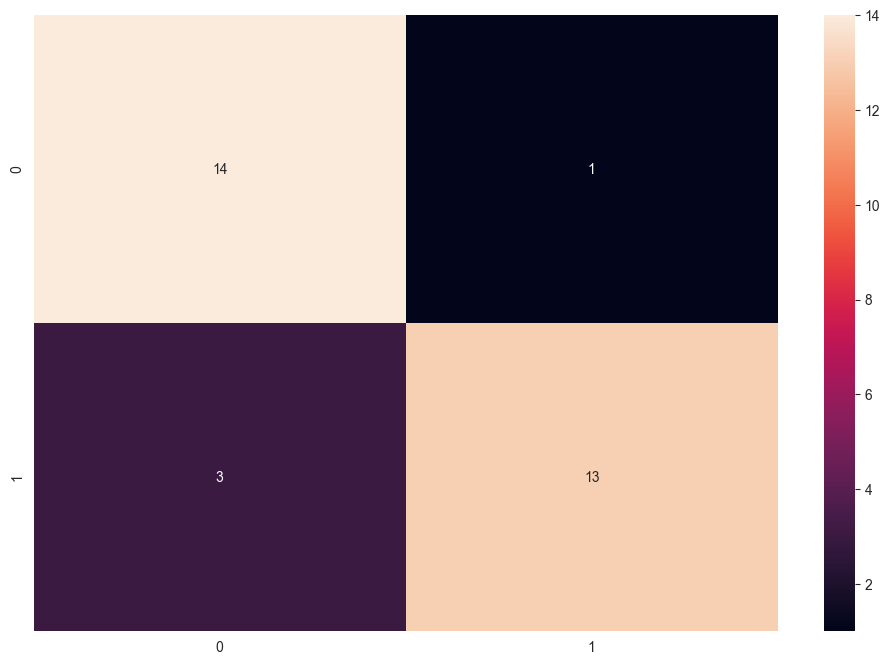

In [82]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [83]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.93      0.81      0.87        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



KNN classifier Report :
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.75      0.86        16

    accuracy                           0.87        31
   macro avg       0.89      0.88      0.87        31
weighted avg       0.90      0.87      0.87        31



Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.93      0.81      0.87        16

    accuracy                           0.87        31
   macro avg       0.88      0.87     